In [1]:
# Import dependencies for data cleansing
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix


# Import Data

In [2]:
#Import the heart_2020_cleaned.csv file
heart_2020_cleaned = pd.read_csv('heart_2020_cleaned.csv')
# Display the first 5 rows of the dataframe
heart_2020_cleaned.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


# Separating Datasets for balancing purposes

In [3]:

# Separate the dataset into two subsets based on the HeartDisease column
heart_disease_yes = heart_2020_cleaned[heart_2020_cleaned['HeartDisease'] == 'Yes']
heart_disease_no = heart_2020_cleaned[heart_2020_cleaned['HeartDisease'] == 'No']



In [4]:
# Display the first 5 rows of the heart_disease_yes dataframe
heart_disease_yes.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
5,Yes,28.87,Yes,No,No,6.0,0.0,Yes,Female,75-79,Black,No,No,Fair,12.0,No,No,No
10,Yes,34.30,Yes,No,No,30.0,0.0,Yes,Male,60-64,White,Yes,No,Poor,15.0,Yes,No,No
35,Yes,32.98,Yes,No,Yes,10.0,0.0,Yes,Male,75-79,White,Yes,Yes,Poor,4.0,No,No,Yes
42,Yes,25.06,No,No,No,0.0,0.0,Yes,Female,80 or older,White,Yes,No,Good,7.0,No,No,Yes
43,Yes,30.23,Yes,No,No,6.0,2.0,Yes,Female,75-79,White,Yes,Yes,Fair,8.0,No,Yes,No


In [5]:
#display the first 5 rows of the heart_disease_no dataframe
heart_disease_no.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [6]:
# Balance the dataset by sampling an equal number of cases from each subset
# Determine the number of samples to match based on the smaller subset
min_count = min(len(heart_disease_yes), len(heart_disease_no))
# Display the number of samples to match
min_count


27373

In [7]:
# Sample from each subset
balanced_heart_disease_yes = heart_disease_yes.sample(n=min_count, random_state=42)
balanced_heart_disease_no = heart_disease_no.sample(n=min_count, random_state=42)


# Combining into a single balanced dataset


In [8]:
# Combine the balanced subsets and reset the index
balanced_dataset = pd.concat([balanced_heart_disease_yes, balanced_heart_disease_no]).reset_index(drop=True)
# Display the first 5 rows of the balanced dataset
balanced_dataset.head()


,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,Yes,25.61,Yes,No,Yes,30.0,30.0,No,Female,50-54,Asian,No,Yes,Poor,3.0,No,No,Yes
1,Yes,27.12,Yes,No,No,3.0,0.0,No,Male,75-79,White,"No, borderline diabetes",Yes,Good,7.0,No,No,No
2,Yes,30.90,No,No,Yes,4.0,30.0,Yes,Female,70-74,White,Yes,No,Fair,7.0,Yes,Yes,No
3,Yes,27.46,No,No,No,0.0,0.0,No,Female,70-74,White,Yes,Yes,Excellent,8.0,No,No,No
4,Yes,26.63,Yes,No,No,0.0,0.0,No,Male,80 or older,White,No,No,Excellent,5.0,No,No,Yes


# Train_Test_Split!

In [9]:
# Split the balanced dataset into training and testing sets
train_set, test_set = train_test_split(balanced_dataset, test_size=0.2, random_state=42)


In [10]:

# Display the size of the training and testing sets
len(train_set), len(test_set)

(43796, 10950)

# Encoding non-numeric columns

In [11]:
# Encode non-numeric columns using one-hot encoding
encoded_dataset = pd.get_dummies(train_set, drop_first=True)  # Using drop_first to avoid dummy variable trap

# Display the first few rows of the encoded dataset to verify the transformation
encoded_dataset.head(), encoded_dataset.shape


(         BMI  PhysicalHealth  MentalHealth  SleepTime  HeartDisease_Yes  \
 49873  28.34             0.0           0.0        8.0             False   
 29833  26.58             0.0           0.0        7.0             False   
 34118  23.73             0.0           0.0        7.0             False   
 7237   23.71             0.0           0.0        7.0              True   
 14143  29.62             0.0           4.0        6.0              True   
 
        Smoking_Yes  AlcoholDrinking_Yes  Stroke_Yes  DiffWalking_Yes  \
 49873         True                False       False            False   
 29833        False                False       False            False   
 34118         True                False       False            False   
 7237          True                False       False            False   
 14143         True                False       False            False   
 
        Sex_Male  ...  Diabetic_Yes  Diabetic_Yes (during pregnancy)  \
 49873     False  ...         

# Encoding age_category

In [12]:
# Define the order for age categories based on the dataset's unique values
age_category_order = ['18-24', '25-29', '30-34', '35-39', '40-44', '45-49',
                      '50-54', '55-59', '60-64', '65-69', '70-74', '75-79', '80 or older']

# Map the age categories to ordinal values
age_category_mapping = {category: index for index, category in enumerate(age_category_order)}
train_set['AgeCategoryOrdinal'] = train_set['AgeCategory'].map(age_category_mapping)

# Drop the original 'AgeCategory' column
train_set_ordinal = train_set.drop('AgeCategory', axis=1)

# Reapply one-hot encoding to the remaining non-numeric columns, excluding 'AgeCategory'
encoded_dataset_with_ordinal_age = pd.get_dummies(train_set_ordinal, drop_first=True)

# Display the first few rows of the dataset to verify the transformation
display(encoded_dataset_with_ordinal_age.head())
display(encoded_dataset_with_ordinal_age.shape)


,BMI,PhysicalHealth,MentalHealth,SleepTime,AgeCategoryOrdinal,HeartDisease_Yes,Smoking_Yes,AlcoholDrinking_Yes,Stroke_Yes,DiffWalking_Yes,...,Diabetic_Yes,Diabetic_Yes (during pregnancy),PhysicalActivity_Yes,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good,Asthma_Yes,KidneyDisease_Yes,SkinCancer_Yes
49873,28.34,0.0,0.0,8.0,9,False,True,False,False,False,...,False,False,True,False,True,False,False,False,False,False
29833,26.58,0.0,0.0,7.0,1,False,False,False,False,False,...,False,False,False,False,True,False,False,True,False,False
34118,23.73,0.0,0.0,7.0,4,False,True,False,False,False,...,False,False,True,False,False,False,False,False,False,False
7237,23.71,0.0,0.0,7.0,10,True,True,False,False,False,...,False,False,True,False,False,False,False,False,False,False
14143,29.62,0.0,4.0,6.0,7,True,True,False,False,False,...,False,False,False,True,False,False,False,False,False,False


(43796, 27)

# Logistic Regression

In [13]:
# Separate features and target variable
X = encoded_dataset_with_ordinal_age.drop('HeartDisease_Yes', axis=1)
y = encoded_dataset_with_ordinal_age['HeartDisease_Yes']

In [14]:
# Apply the one-hot encoding
X_encoded = pd.get_dummies(X, drop_first=True)

In [15]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

In [16]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [17]:
# Define the logistic regression model
logistic_model = LogisticRegression()

In [18]:
# Fit the model to the training data
logistic_model.fit(X_train_scaled, y_train)

LogisticRegression()

In [19]:
# Train a Logistic Regression model and print the model score
classifier = LogisticRegression(solver='lbfgs', random_state=1)
classifier.fit(X_train_scaled, y_train)
print(f"Training Data Score: {classifier.score(X_train_scaled, y_train)}")

Training Data Score: 0.7625870533165886


In [20]:
# Make and save testing predictions with the saved logistic regression model using the test data
predictions = classifier.predict(X_test_scaled)
# Review the predictions
results = pd.DataFrame({"Prediction": predictions, "Actual": y_test}).reset_index(drop=True)
results.head()

,Prediction,Actual
0,False,False
1,False,False
2,False,False
3,False,True
4,True,False


In [21]:
# Calculate the accuracy score by evaluating `y_test` vs. `testing_predictions`.
accuracy_score(y_test, predictions)

0.7658675799086758

In [22]:
# View the confusion matrix
predictions = logistic_model.predict(X_test_scaled)
print("Accuracy:", accuracy_score(y_test, predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test, predictions))

Accuracy: 0.7658675799086758
Confusion Matrix:
 [[3288 1087]
 [ 964 3421]]


In [23]:
# View the false positive and false negative rates
tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()
print(f"False Positive Rate: {fp / (fp + tn)}")
print(f"False Negative Rate: {fn / (fn + tp)}")

False Positive Rate: 0.24845714285714285
False Negative Rate: 0.21984036488027367


In [24]:
# View the true positive and true negative rates
print(f"True Positive Rate: {tp / (tp + fn)}")
print(f"True Negative Rate: {tn / (tn + fp)}")

True Positive Rate: 0.7801596351197263
True Negative Rate: 0.7515428571428572


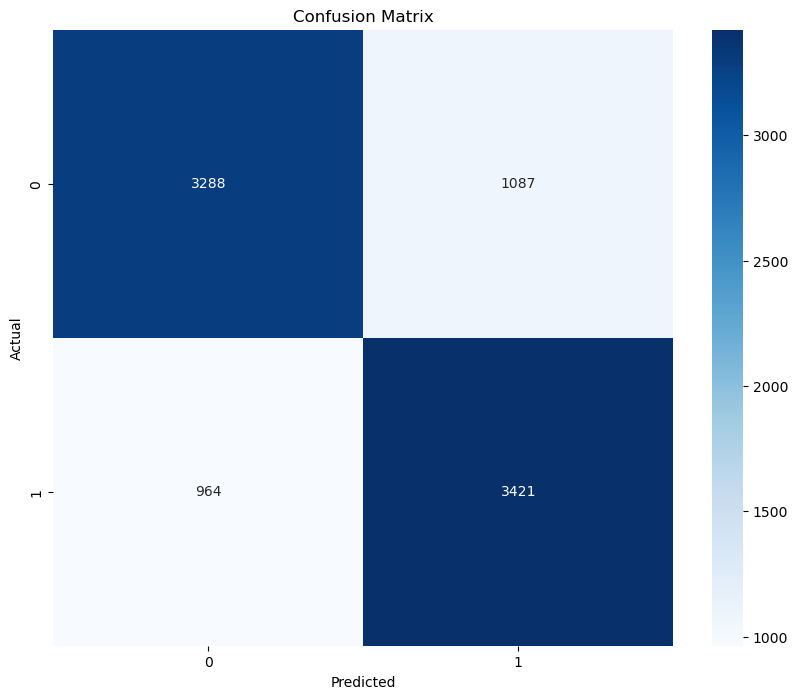

In [25]:
# create a heatmap of the confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, predictions)

plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [26]:
# Show them model's accuracy, precision, recall, and F1 score
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

       False       0.77      0.75      0.76      4375
        True       0.76      0.78      0.77      4385

    accuracy                           0.77      8760
   macro avg       0.77      0.77      0.77      8760
weighted avg       0.77      0.77      0.77      8760



In [27]:
# Show the model's accuracy, precision, recall, and F1 score
from sklearn.metrics import precision_score, recall_score, f1_score
print(f'Accuracy: {accuracy_score(y_test, predictions)}')
print(f'Precision: {precision_score(y_test, predictions)}')
print(f'Recall: {recall_score(y_test, predictions)}')
print(f'F1 Score: {f1_score(y_test, predictions)}')

Accuracy: 0.7658675799086758
Precision: 0.7588731144631766
Recall: 0.7801596351197263
F1 Score: 0.7693691667603733


In [28]:
# View the feature weights
feature_names = X_encoded.columns
print(logistic_model.coef_)
print(feature_names)

[[ 0.04201393  0.04932545  0.07678161 -0.04182025  0.96734814  0.19262877
  -0.05197197  0.34988229  0.11580369  0.37476238 -0.08784592 -0.11030617
  -0.09078484 -0.03312367 -0.09571894  0.01290899  0.20964762  0.02875675
  -0.00915772  0.56272021  0.43814483  0.50806648  0.15590826  0.10340414
   0.1527485   0.02369604]]
Index(['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime',
       'AgeCategoryOrdinal', 'Smoking_Yes', 'AlcoholDrinking_Yes',
       'Stroke_Yes', 'DiffWalking_Yes', 'Sex_Male', 'Race_Asian', 'Race_Black',
       'Race_Hispanic', 'Race_Other', 'Race_White',
       'Diabetic_No, borderline diabetes', 'Diabetic_Yes',
       'Diabetic_Yes (during pregnancy)', 'PhysicalActivity_Yes',
       'GenHealth_Fair', 'GenHealth_Good', 'GenHealth_Poor',
       'GenHealth_Very good', 'Asthma_Yes', 'KidneyDisease_Yes',
       'SkinCancer_Yes'],
      dtype='object')


In [29]:
# View the two largest and two smallest feature weights for true positive predictions
weights = logistic_model.coef_[0]
pairs = list(zip(weights, feature_names))
pairs.sort(key=lambda x: x[0])
print("Largest weights for true positive predictions:")
for pair in pairs[-2:]:
    print(pair)
print("\nSmallest weights for true positive predictions:")
for pair in pairs[:2]:
    print(pair)
    

Largest weights for true positive predictions:
(0.562720213453918, 'GenHealth_Fair')
(0.9673481389084692, 'AgeCategoryOrdinal')

Smallest weights for true positive predictions:
(-0.11030617373583533, 'Race_Black')
(-0.09571894249189686, 'Race_White')


In [30]:
# view the age category with the highest true positive rate
age_category_tp = X_test[(predictions == 1) & (y_test == 1)]['AgeCategoryOrdinal']
age_range = age_category_order[12]
print(age_range)


80 or older


# Model Analysis
The logistic regression model is able to predict heart diesease with an overall weighted score of 77 percent accuracy. Training and testing accuracy were 76.25 and 76.58 respectively. 

Overfitting: The model's performance in training and testing suggest that overfitting is not a concern with the model. the training and testing scores were close in performance and the scores do not suggest overfitting.

Application: The model correctly predicted heart disease was present with 78 percent accuracy. The model correctly predicted the absence of heart disease with 75 percent accuracy.

Conclusion: The logistic regression model is balanced and does not suffer from overfitting. However, the achievable accuracy is not acceptable for use in medical diagnosis of heart disease. The rate of producing false negative predictions was 21 percent. Thus, over 20 percent of patients suffering from heart disease diagnosed with the model would be undiagnosed. 
